# Time Series Analysis of the 2019 Novel Coronavirus Pandemic

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Import-Data" data-toc-modified-id="1.-Import-Data-1">1. Import Data</a></span><ul class="toc-item"><li><span><a href="#Necessary-Imports" data-toc-modified-id="Necessary-Imports-1.1">Necessary Imports</a></span></li><li><span><a href="#Read-Google-Sheet-into-DataFrame" data-toc-modified-id="Read-Google-Sheet-into-DataFrame-1.2">Read Google Sheet into DataFrame</a></span><ul class="toc-item"><li><span><a href="#Global-Dataset" data-toc-modified-id="Global-Dataset-1.2.1">Global Dataset</a></span></li><li><span><a href="#U.S.-Dataset" data-toc-modified-id="U.S.-Dataset-1.2.2">U.S. Dataset</a></span></li></ul></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-1.3">Analysis</a></span><ul class="toc-item"><li><span><a href="#Confirmed-Cases" data-toc-modified-id="Confirmed-Cases-1.3.1">Confirmed Cases</a></span></li><li><span><a href="#Recovered-Cases" data-toc-modified-id="Recovered-Cases-1.3.2">Recovered Cases</a></span></li><li><span><a href="#Death-Cases" data-toc-modified-id="Death-Cases-1.3.3">Death Cases</a></span></li></ul></li></ul></li><li><span><a href="#2.-Parse-the-Time-Series-Data-(Mainland-China)" data-toc-modified-id="2.-Parse-the-Time-Series-Data-(Mainland-China)-2">2. Parse the Time-Series Data (Mainland China)</a></span><ul class="toc-item"><li><span><a href="#Time-Series-of-Confirmed-Cases-in-Mainland-China" data-toc-modified-id="Time-Series-of-Confirmed-Cases-in-Mainland-China-2.1">Time-Series of Confirmed Cases in Mainland China</a></span></li><li><span><a href="#The-Recovered,-and-Death-cases-in-Mainland-China" data-toc-modified-id="The-Recovered,-and-Death-cases-in-Mainland-China-2.2">The Recovered, and Death cases in Mainland China</a></span></li><li><span><a href="#Cross-Comparisons-within-different-categories" data-toc-modified-id="Cross-Comparisons-within-different-categories-2.3">Cross-Comparisons within different categories</a></span></li><li><span><a href="#Cross-comparisons-within-provinces" data-toc-modified-id="Cross-comparisons-within-provinces-2.4">Cross-comparisons within provinces</a></span></li><li><span><a href="#Identify-periodicities-&amp;-similarities" data-toc-modified-id="Identify-periodicities-&amp;-similarities-2.5">Identify periodicities &amp; similarities</a></span></li></ul></li><li><span><a href="#3.-Parse-the-time-series-data-(in-the-U.-S.,-Australia-&amp;-Canada)" data-toc-modified-id="3.-Parse-the-time-series-data-(in-the-U.-S.,-Australia-&amp;-Canada)-3">3. Parse the time-series data (in the U. S., Australia &amp; Canada)</a></span><ul class="toc-item"><li><span><a href="#Confirmed-Cases-in-Australia-&amp;-Canada" data-toc-modified-id="Confirmed-Cases-in-Australia-&amp;-Canada-3.1">Confirmed Cases in Australia &amp; Canada</a></span></li><li><span><a href="#Confirmed-Cases-in-the-U.S." data-toc-modified-id="Confirmed-Cases-in-the-U.S.-3.2">Confirmed Cases in the U.S.</a></span></li><li><span><a href="#Confirmed-Cases-on-Cruise-Ships" data-toc-modified-id="Confirmed-Cases-on-Cruise-Ships-3.3">Confirmed Cases on Cruise Ships</a></span></li></ul></li><li><span><a href="#4.-Time-Series-Lag-Scatter-Plots" data-toc-modified-id="4.-Time-Series-Lag-Scatter-Plots-4">4. Time Series Lag Scatter Plots</a></span></li><li><span><a href="#5.-Time-Series-Autocorrelation-Plots" data-toc-modified-id="5.-Time-Series-Autocorrelation-Plots-5">5. Time Series Autocorrelation Plots</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-6">Conclusions</a></span></li><li><span><a href="#References" data-toc-modified-id="References-7">References</a></span></li></ul></div>

This notebook is to perform analysis and time series charting of 2019 novel coronavirus disease (COVID-19) globally:

## 1. Import Data

The data source repo to be used, is created and maintained by the <a href="https://systems.jhu.edu/">the Center for Systems Science and Engineering (CSSE) at the Johns Hopkins University</a>, and the official maps can be viewed <a href="https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6">here</a>. If you are having an issue accessing the Google Sheet, please try downloading the data source provided on their <a href="https://github.com/CSSEGISandData/2019-nCoV">GitHub repo</a>.

The csv file has three types of cases - `Confirmed`, `Recovered` and `Deaths` - spotted inside and outside Mainland China, across the time span from 1/21/2020 to Current.

### Necessary Imports

In [1]:
from io import BytesIO
import requests
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

### Read Google Sheet into DataFrame

#### Global Dataset

First, read the three tabs on Google Sheet - namely `'confirmed'`, `'death'`, `'recovered'` - into three individual DataFrames, and append them one after another into an empty list.

In [2]:
cases = ['confirmed', 'deaths', 'recovered']
sheet = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_'
suffix = '_global.csv'
df_list = []

for i in range(len(cases)):
    ts_url = sheet + cases[i] + suffix
    df = pd.read_csv(ts_url, header=0, escapechar='\\')
    display(df.head(3))
    df_list.append(df)
    exec("{0}=df".format(cases[i]))

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,29640,30175,30451,30616,30967,31238,31517,31836,32022,32324
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2114,2192,2269,2330,2402,2466,2535,2580,2662,2752
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,12248,12445,12685,12968,13273,13571,13907,14272,14657,15070


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,639,675,683,703,721,733,746,774,807,819
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,47,49,51,53,55,58,62,65,69,72
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,869,878,885,892,897,905,912,920,928,937


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,9869,10174,10306,10674,12604,13934,14131,15651,16041,17331
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1217,1250,1298,1346,1384,1438,1459,1516,1559,1592
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,8792,8920,9066,9202,9371,9674,9897,10040,10342,10832


In [3]:
# shape of matrices for confirmed, death, and recovered
df_list[0].shape, df_list[1].shape, df_list[2].shape

((266, 168), (266, 168), (253, 168))

#### U.S. Dataset

In [4]:
cases = ['confirmed', 'deaths']
sheet = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_'
suffix = '_US.csv'
us_df_list = []

for i in range(len(cases)):
    us_ts_url = sheet + cases[i] + suffix
    df = pd.read_csv(us_ts_url, header=0, escapechar='\\')
    display(df.head(3))
    us_df_list.append(df)
    exec("{0}=df".format(cases[i]))

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,226,231,247,247,247,253,257,267,280,280
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,30,30,30,30,30,30,30,30,31,31


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,5,5,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,2,2,2,2,2,2,2,2,2,2


In [5]:
# shape of matrices for confirmed, death, and recovered
us_df_list[0].shape, us_df_list[1].shape

((3261, 175), (3261, 176))

##### Repair and summarize the U.S. Data

In the U.S. Dataset, there could be one or more administrative regions per state, and in order to summarize and simplify the dataset, the following function `sum_all_admins_in_state` is to be declared and used to sum all `Admin` inside one state into a single record.

In [93]:
def sum_all_admins_in_state(df, state):
    
    # query all sub-records of the selected country
    tmp_df = df[df["Province_State"]==state]
    
    # create a new row which is to sum all statistics of this country, and 
    # assign the summed value of all sub-records to the date_time column of the new row
    sum_row = tmp_df.sum(axis=0)
    
    # assign the constants to the ['Province/State', 'Country/Region', 'Lat', 'Long'] columns; 
    # note that the Country/Region column will be renamed from solely the country name to country name + ", Sum".
    sum_row.loc['UID'] = "NaN"
    sum_row.loc['Admin2'] = "NaN"
    sum_row.loc['FIPS'] = "NaN"
    sum_row.loc['iso2'] = "US"
    sum_row.loc['iso3'] = "USA"
    sum_row.loc['code3'] = 840
    sum_row.loc['Country_Region'] = "US"
    sum_row.loc['Province_State'] = state + ", Sum"
    sum_row.loc['Lat'] = tmp_df['Lat'].values[0]
    sum_row.loc['Long_'] = tmp_df['Long_'].values[0]
    
    # append the new row to the original DataFrame, and 
    # remove the sub-records of the selected country.
    df = pd.concat([df, sum_row.to_frame().T], ignore_index=True)
    #display(df[df["Province_State"].str.contains(state + ", Sum")])
    df=df[df['Province_State'] != state]
    df.loc[df.Province_State == state+", Sum", 'Province_State'] = state
    
    return df

In [94]:
for i in range(2):
    usa_ts_df=us_df_list[i]
    for state in usa_ts_df.Province_State.unique():
        usa_ts_df = sum_all_admins_in_state(usa_ts_df, state)
    us_df_list[i]=usa_ts_df

### Analysis

Now, let's proceed to these three categories (`'confirmed'`, `'death'`, `'recovered'`) individually.

#### Confirmed Cases

As shown below, of the 266 rows of records in the first DataFrame being converted and parsed from Google Sheet, 33 rows are for cases reported for each province in Mainland China.

In [8]:
df_confirmed = df_list[0]
print(df_confirmed[df_confirmed['Country/Region'] == 'China'].shape)
df_confirmed[df_confirmed['Country/Region'] == 'China'].head()

(33, 168)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20
49,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,991,991,991,991,991,991,991,991,991,991
50,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,863,874,891,905,912,919,922,923,925,926
51,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,582,582,582,582,582,582,582,582,582,582
52,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,...,363,363,363,363,363,363,363,363,363,363
53,Gansu,China,37.8099,101.0583,0,2,2,4,7,14,...,161,161,162,163,163,164,164,164,164,164


While some countries/regions like China have been displayed with multiple rows each representing confirmed cases per province with reported cases, others are listed in the DataFrame as a single row that sums confirmed cases across states/provinces, such as the United States shown below:

In [9]:
df_confirmed_usa = df_confirmed[df_confirmed['Country/Region'] == 'US']
print(df_confirmed_usa.shape)
df_confirmed_usa.head()

(1, 168)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20
225,NaN,US,37.0902,-95.7129,1,1,2,2,5,5,...,2382426,2422299,2467554,2510259,2549294,2590668,2636414,2687588,2742049,2794153


#### Recovered Cases

Same here, for the purpose of comparison, we would need to get the figures of the other two categories - `recovered` and `deaths` besides `confirmed` cases.

In [10]:
df_recovered = df_list[2]
df_recovered.tail(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20
250,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,159,161,161,161,161,161,200,200,200,241
251,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,...,4194,4267,4331,4391,4448,4506,4506,4627,4690,4690
252,NaN,Lesotho,-29.609988,28.233608,0,0,0,0,0,0,...,2,2,4,4,4,4,4,11,11,11


#### Death Cases

In [11]:
df_death = df_list[1]
df_death.tail(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
265,NaN,Lesotho,-29.609988,28.233608,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As we can tell from the snapshots of these dataframes, cases are reported in three geographic administrative units: 
  1. for countries/regions with significant numbers of confirmed/deaths/recovered cases (e.g. Mainland China), number of cases are reported per province/state; 
  2. for other regions/countries, number of cases are summarized per region/country (e.g. Australia, or Canada); 
  3. Also, the global DataFrame lists `Cruise Ship` since the Diamond Princess and several other cruise ships themselves contain a considerable amount of confirmed/deaths cases.

## 2. Parse the Time-Series Data (Mainland China)

Now we have obtained DataFrame for each type of coronavirus cases across the globe. We will apply a filter on each of the DataFrames, and analyze the Confirmed, Recovered, and Death cases separately, to see how the time-series evolved inside Mainland China.

### Time-Series of Confirmed Cases in Mainland China

First, a list called `provinces_list` needs to be extracted from the selected rows, and then be concatenated with the category (e.g. `_Confirmed`), in order to differentiate from the other two categories (e.g. `_Recovered` and `_Deaths`).

In [12]:
provinces_list = df_confirmed[df_confirmed['Country/Region'] == 'China'].iloc[:,0:1].T.values.tolist()[0]

In [13]:
map_output = map(lambda x: x + '_Confirmed', provinces_list)
list_map_output = list(map_output)

Next, let's remove the first five rows from the DataFrame `df` (which are the row#, Province/State, Country/Region, Unnamed:2, and Unnamed:3 columns, and are not needed for time-series charting), specify the index to the matrix, and perform a `Transpose` to have the `date_time` index shown as row indices.

In [14]:
df0 = df_confirmed[df_confirmed['Country/Region'] == 'China'].iloc[:,5:].fillna(0)
df0.index = pd.Index(list_map_output, name='date_time')
df0 = df0.T
df0.tail(3)

date_time,Anhui_Confirmed,Beijing_Confirmed,Chongqing_Confirmed,Fujian_Confirmed,Gansu_Confirmed,Guangdong_Confirmed,Guangxi_Confirmed,Guizhou_Confirmed,Hainan_Confirmed,Hebei_Confirmed,...,Shaanxi_Confirmed,Shandong_Confirmed,Shanghai_Confirmed,Shanxi_Confirmed,Sichuan_Confirmed,Tianjin_Confirmed,Tibet_Confirmed,Xinjiang_Confirmed,Yunnan_Confirmed,Zhejiang_Confirmed
7/1/20,991,923,582,363,164,1642,254,147,171,349,...,320,792,713,198,595,198,1,76,185,1269
7/2/20,991,925,582,363,164,1642,254,147,171,349,...,320,792,714,198,595,198,1,76,186,1269
7/3/20,991,926,582,363,164,1643,254,147,171,349,...,320,792,715,198,595,198,1,76,186,1269


Also, we would need to standardize the date_time string (esp. that the year should be represented as XXXX instead of XX), and then to convert it from a string type to a datetime type:

In [15]:
df0.index

Index(['1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20',
       '1/29/20', '1/30/20', '1/31/20', '2/1/20',
       ...
       '6/24/20', '6/25/20', '6/26/20', '6/27/20', '6/28/20', '6/29/20',
       '6/30/20', '7/1/20', '7/2/20', '7/3/20'],
      dtype='object', length=163)

In [16]:
df0.index = df0.index.str.replace('/20', '/2020')

In [17]:
df0.index = df0.index.str.replace('2020/2020', '20/2020')

In [18]:
df0.index = pd.to_datetime(df0.index, format='%m/%d/%Y', exact = False)

If the datetime conversion is successful, use the following cell to validate and check how many rows of datetime records are in the dataframe.

In [19]:
print("Dataframe shape: ", df0.shape)
time_diff = (df0.index[-1] - df0.index[0])
print("Number of hours between start and end dates: ", time_diff.total_seconds()/3600 + 1)

Dataframe shape:  (163, 33)
Number of hours between start and end dates:  3889.0


The following will achieve three different plots:
1. Plotting all the time series on one axis (line-plot)
2. Plotting them all on separate subplots to see them more clearly (sharing the x axis)
3. Plotting all the time series on one axis (scatterplot)

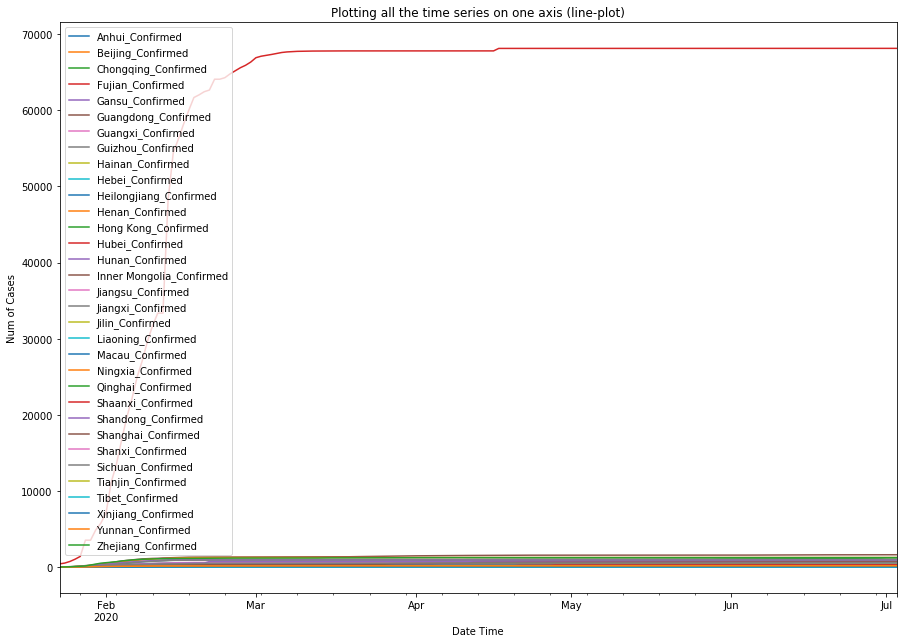

In [20]:
df0.plot(figsize=(15,10.5), title='Plotting all the time series on one axis (line-plot)').legend(loc='upper left')
plt.axis(aspect='equal'); plt.xlabel('Date Time'); text = plt.ylabel('Num of Cases')

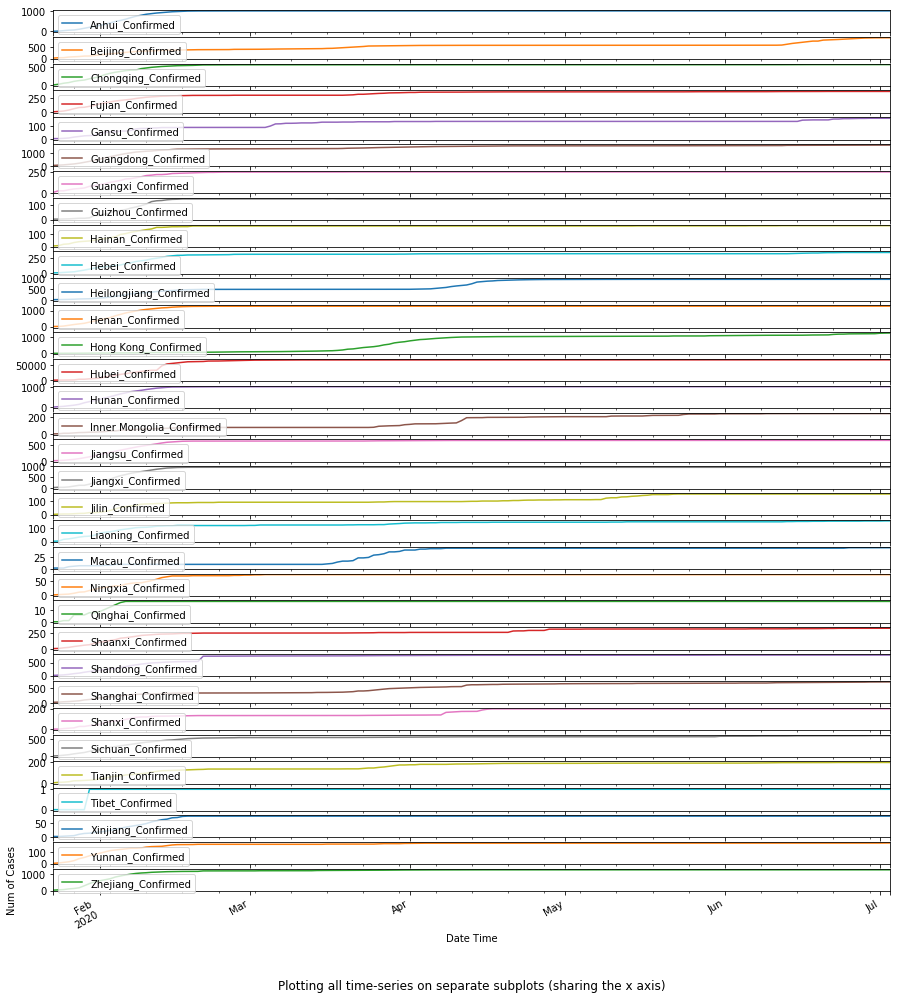

In [21]:
ax_array = df0.plot(subplots=True, figsize=(15,18))
for ax in ax_array:
    ax.legend(loc='upper left')
plt.axis(aspect='equal'); plt.xlabel('Date Time'); plt.ylabel('Num of Cases')
text = plt.title('Plotting all time-series on separate subplots (sharing the x axis)', pad="-120")

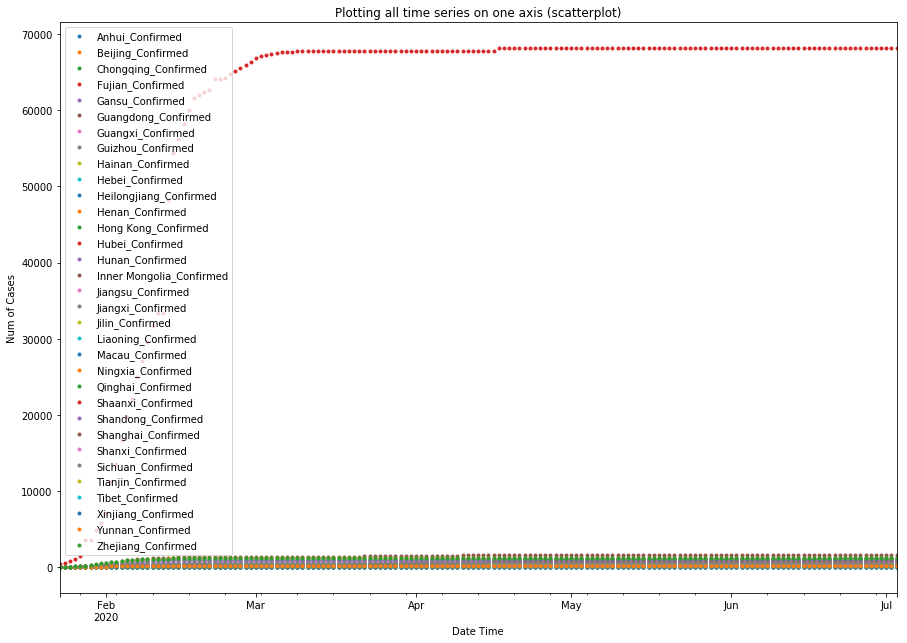

In [22]:
df0.plot(y=list_map_output, style='.', figsize=(15,10.5),
         title="Plotting all time series on one axis (scatterplot)").legend(loc='upper left')
plt.axis(aspect='equal'); plt.xlabel('Date Time'); text = plt.ylabel('Num of Cases')

From the three plots shown above, we can tell that within Mainland China, Hubei province has the largest number of confirmed COVID-19 cases, preceded by Guangdong and Zhejiang provinces.

### The Recovered, and Death cases in Mainland China

Now the confirmed COVID-19 cases for each province in mainland China are shown as above, we are to define a function `plot_per_country` that is to help plot other countries/regions, not only for the `confirmed` cases, but also other cases (`Recovered` or `Deaths`).

In [23]:
def plot_per_country(df, country_name, category = "Confirmed", ref_df = df0):
    """to help us plot other countries/regions, not only for the confirmed cases, 
    but also other cases (Recovered or Deaths).
    """
    if 'Country/Region' in df.columns:
        provinces_list = df[df['Country/Region'] == country_name].iloc[:,0:1].T.values.tolist()[0]
    else:
        provinces_list = df[df['Country_Region'] == country_name].iloc[:,6:7].T.values.tolist()[0]
        
    map_output = map(lambda x: x + '_' + category, provinces_list)
    list_map_output = list(map_output)

    if 'Country/Region' in df.columns:
        df0 = df[df['Country/Region'] == country_name].iloc[:,5:].fillna(0)
    else:
        df0 = df[df['Country_Region'] == country_name].iloc[:,11:].fillna(0)
    
    df0.index = pd.Index(list_map_output, name='date_time')
    df0 = df0.loc[:, ~df0.columns.str.contains('^Unnamed')]
    df0 = df0.T
    df0.index = df0.index.str.replace('/20', '/2020')
    df0.index = df0.index.str.replace('2020/2020', '20/2020')
    df0.index = pd.to_datetime(df0.index, format='%m/%d/%Y', exact = False)
    
    width_multiplier = df0.shape[1]/5

    df0.plot(figsize=(15,2*width_multiplier), 
             title='Plotting all the time series on one axis (line-plot)').legend(loc='upper left')
    plt.axis(aspect='equal'); plt.xlabel('Date Time'); plt.ylabel('Num of Cases')
    
    ax_array = df0.plot(subplots=True, figsize=(15,3*width_multiplier))
    for ax in ax_array:
        ax.legend(loc='upper left')
    plt.axis(aspect='equal'); plt.xlabel('Date Time'); plt.ylabel('Num of Cases')
    text = plt.title('Plotting all time-series on separate subplots (sharing the x axis)', pad="-120")
    
    df0.plot(y=list_map_output, style='.', figsize=(15,2*width_multiplier),
         title="Plotting all time series on one axis (scatterplot)").legend(loc='upper left')
    plt.axis(aspect='equal'); plt.xlabel('Date Time'); plt.ylabel('Num of Cases')
    
    return df0

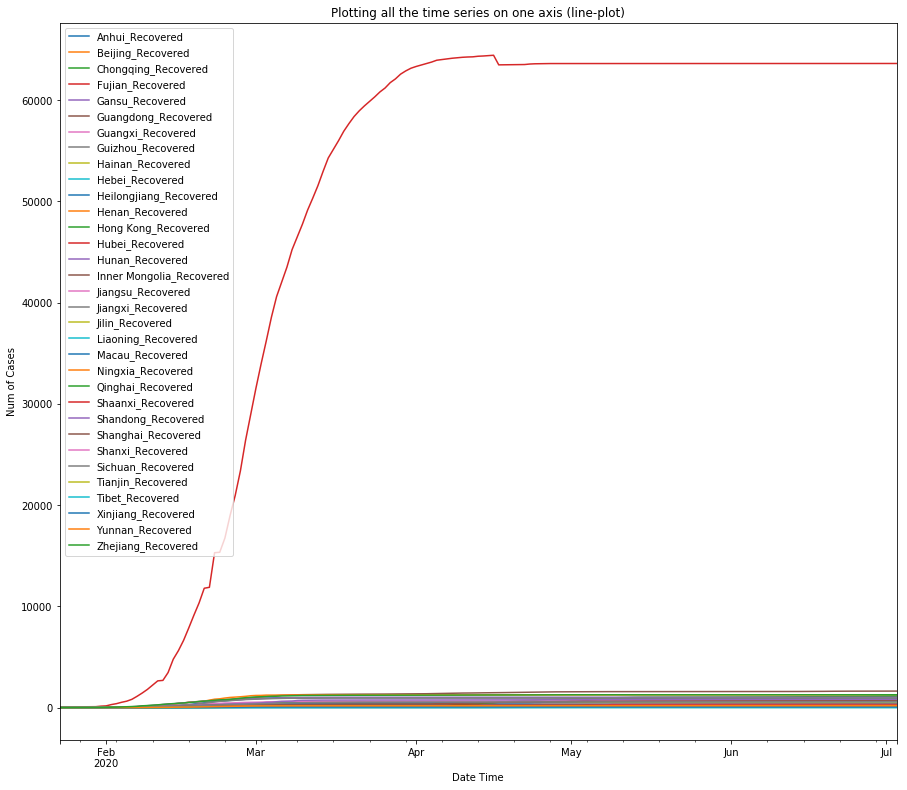

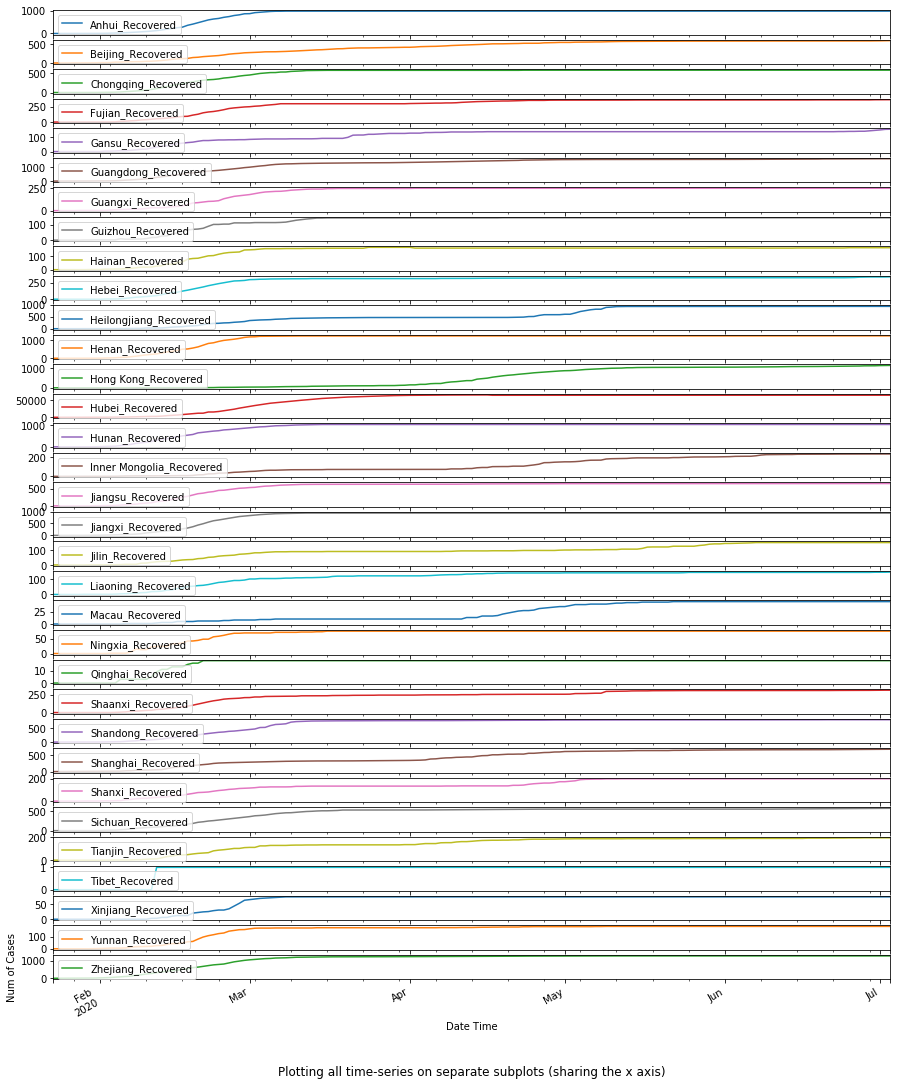

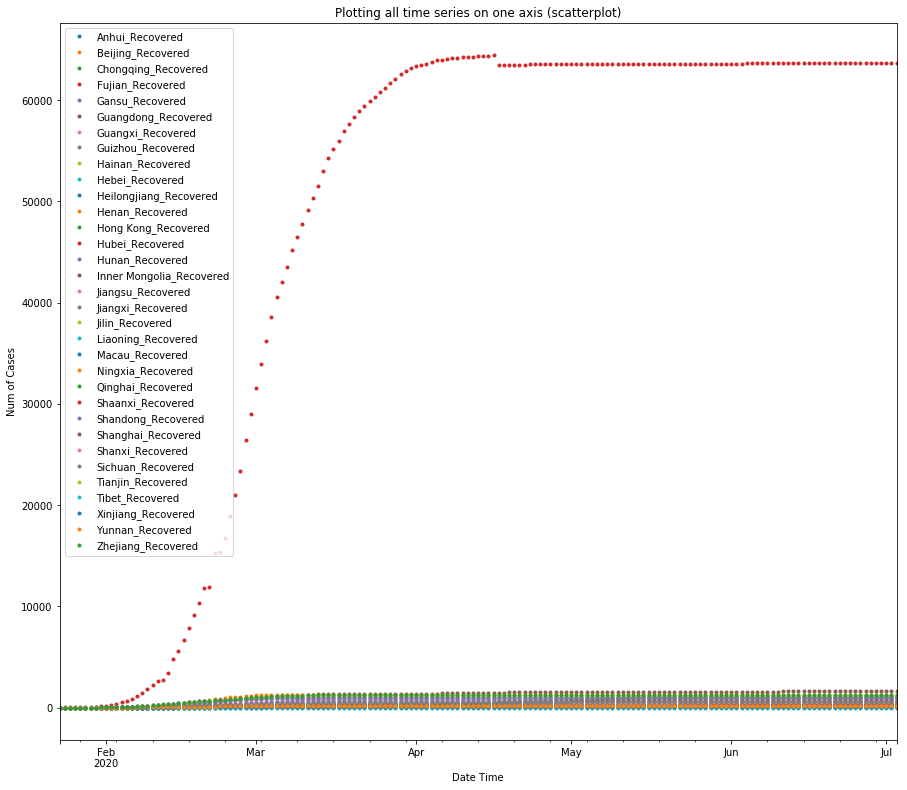

In [24]:
df_recovered_china = plot_per_country(df_recovered, "China", "Recovered")

The three plots shown above indicate that Hubei province also has the largest number of recovered cases from COVID-19, preceded by Zhejiang and Hunan provinces.

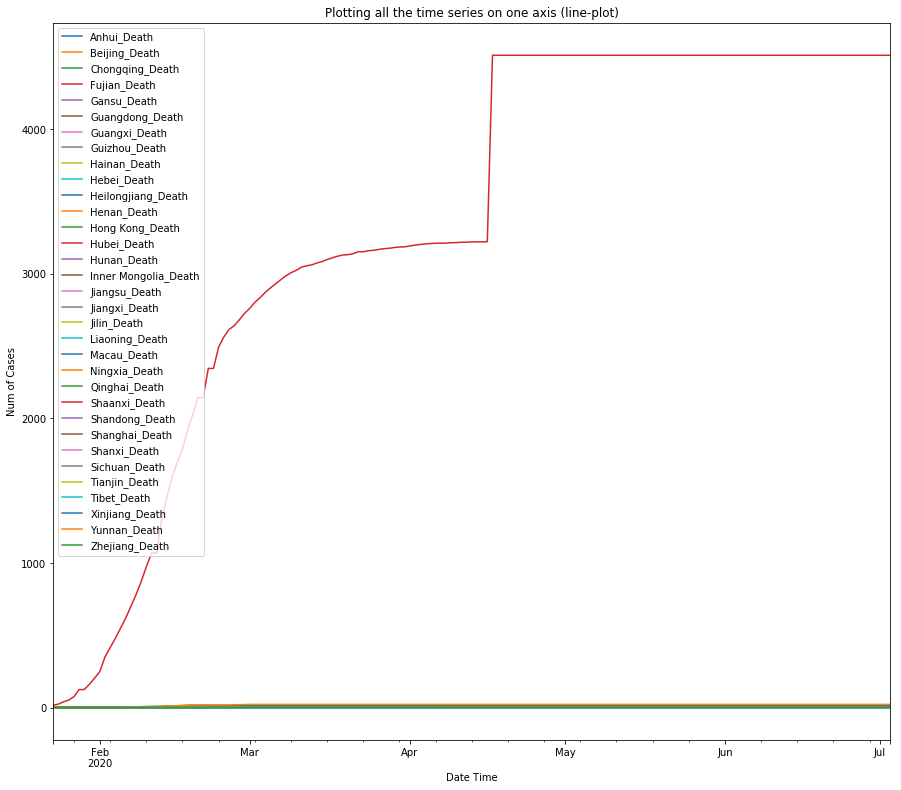

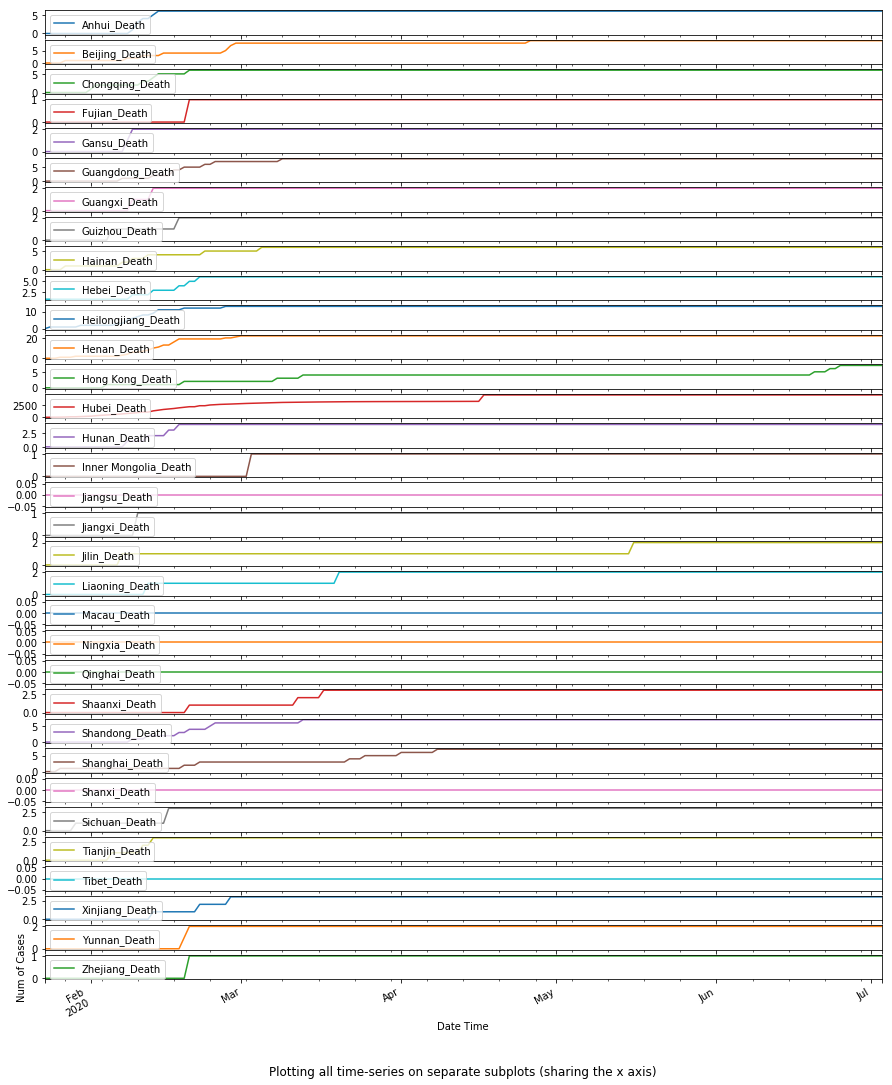

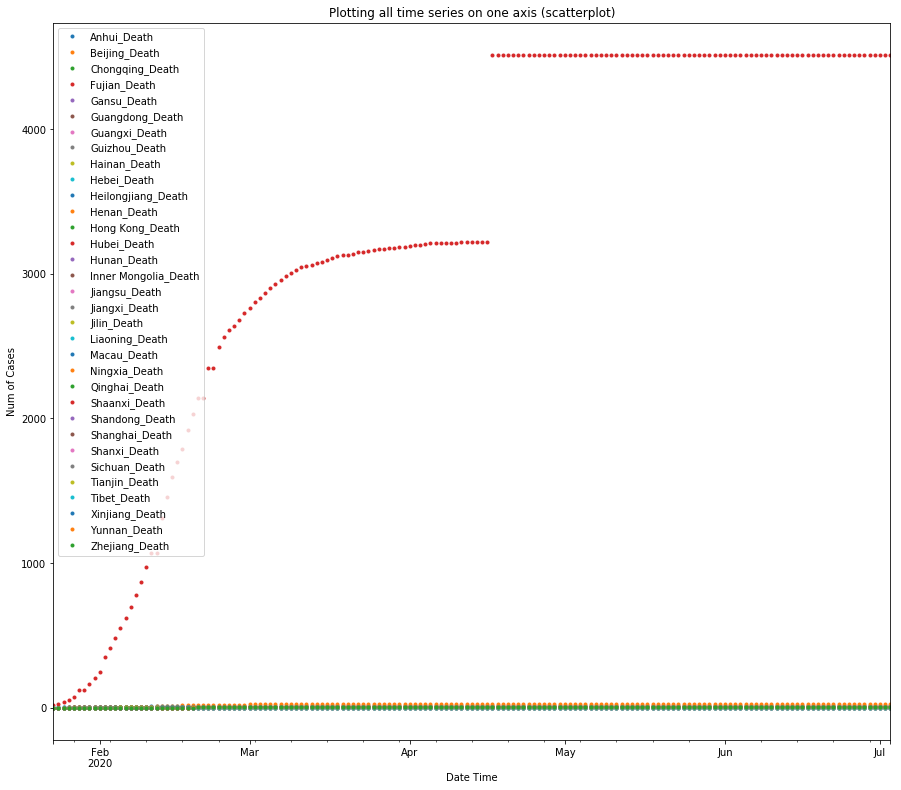

In [25]:
df_death_china = plot_per_country(df_death, "China", "Death")

Unfortunately, among all provinces of Mainland China, Hubei again has the largest number of deaths caused by COVID-19, followed by the Heilongjiang and Henan provinces.

### Cross-Comparisons within different categories

Now we have seen the confirmed, recovered, and death cases caused by COVID-19 for each province in mainland China, let's perform a cross comparison within these three categories by viewing the three time-series in a single plot per single province.

First, make sure these three DataFrames are of the same length (in time-series).

In [26]:
df0.shape, df_recovered_china.shape, df_death_china.shape

((163, 33), (163, 33), (163, 33))

In [27]:
def cross_compare_per_province(province="Hubei"):
    """ Used to plot the time-series of the confirmed, recovered and death 
    cases per province;
        Input: string for province name
        Output: provides three plots of the cross comparison per province
    """
    key0 = province + '_Confirmed'
    key1 = province + '_Recovered'
    key2 = province + '_Death'
    
    df_l = df0.loc[~df0.index.duplicated(keep='first')]
    df_m = df_recovered_china.loc[~df_recovered_china.index.duplicated(keep='first')]
    df_r = df_death_china.loc[~df_death_china.index.duplicated(keep='first')]
    
    df_all_china = pd.concat([df_l[key0], df_m[key1], df_r[key2]], axis=1)
    df_all_china.plot(figsize=(15,2))
    plt.axis(aspect='equal'); plt.xlabel('Date Time'); plt.ylabel('Num of Cases')
    
    df_all_china.plot(subplots=True, figsize=(15,3))
    plt.axis(aspect='equal'); plt.xlabel('Date Time'); plt.ylabel('Num of Cases')
    
    df_all_china.plot(y=[key0, key1, key2], style='.', figsize=(15,2))
    plt.axis(aspect='equal'); plt.xlabel('Date Time'); plt.ylabel('Num of Cases')
    
    return df_all_china

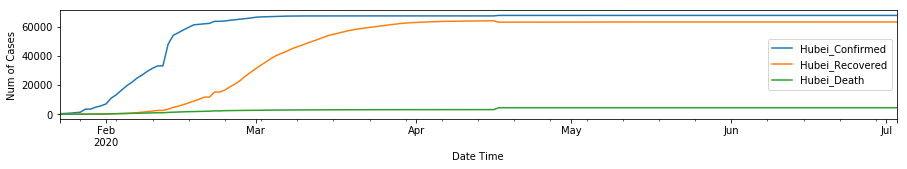

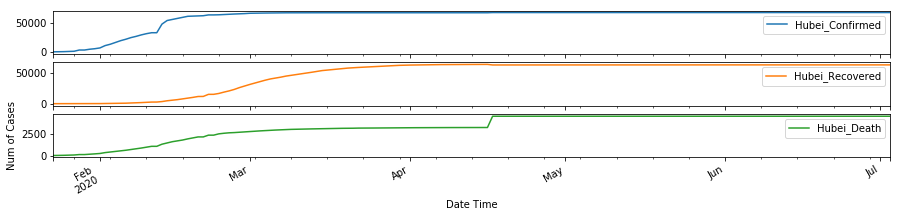

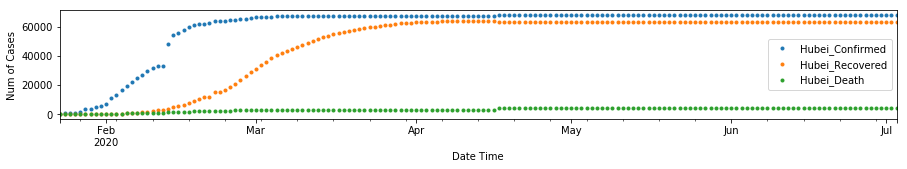

In [28]:
df_hubei = cross_compare_per_province()

In order to help understand the development trend of COVID-19, we need to obtain the `Recovered_Rate` and `Death_Rate` per state/province/region/country, and decide when is the turning point for Recovered_Rate to have surpassed Death_Rate.
```
Recovered_Rate = (# of Recovered Cases)/(# of Confirmed Cases)
Death_Rate = (# of Death Cases)/(# of Confirmed Cases)
```
Function `calc_rate_per_province` is defined to plot the trends of these two rates:

In [29]:
def calc_rate_per_province(province="Hubei"):
    """ Used to plot the time-series of the recovered and death 
    rates per province;
        Input: string for province name
        Output: provides three plots of the cross comparison per province
    """
    key0 = province + '_Confirmed'
    key1 = province + '_Recovered'
    key2 = province + '_Death'
    
    df_l = df0.loc[~df0.index.duplicated(keep='first')]
    df_m = df_recovered_china.loc[~df_recovered_china.index.duplicated(keep='first')]
    df_r = df_death_china.loc[~df_death_china.index.duplicated(keep='first')]

    df_all_china = pd.concat([(df_m[key1]*1.0).div((df_l[key0]*1.0), axis='index'),
                              (df_r[key2]*1.0).div((df_l[key0]*1.0), axis='index')],
                             keys=[key1 + '_Rate', key2 + '_Rate'],
                             axis=1)
    
    df_all_china.plot(figsize=(15,2))
    plt.axis(aspect='equal'); plt.xlabel('Date Time'); plt.ylabel('% of Confirmed Cases')
    
    df_all_china.plot(subplots=True, figsize=(15,3))
    plt.axis(aspect='equal'); plt.xlabel('Date Time'); plt.ylabel('% of Confirmed Cases')
    
    df_all_china.plot(style='.', figsize=(15,2))   
    plt.axis(aspect='equal'); plt.xlabel('Date Time'); plt.ylabel('% of Confirmed Cases')

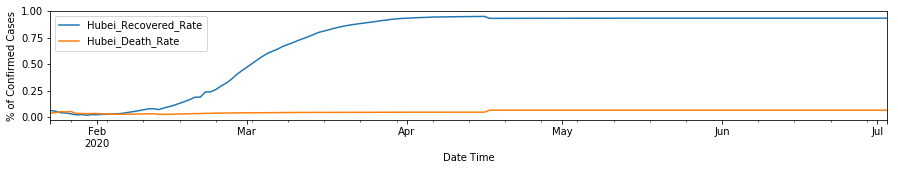

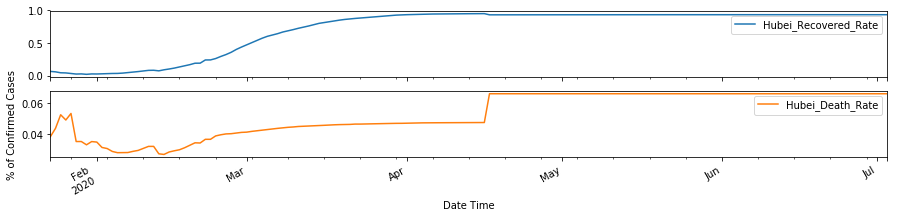

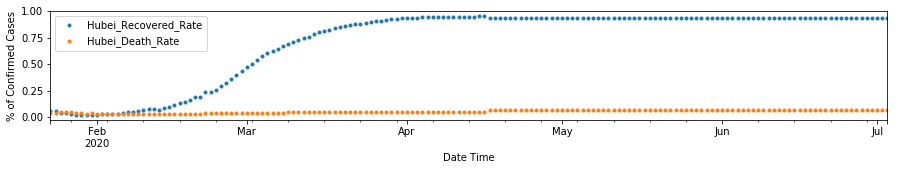

In [30]:
calc_rate_per_province()

We can tell from the plots above, the `Recovered Rate` has since surpassed the `Death Rate` for Hubei Province after 02/05/2020.

### Cross-comparisons within provinces

After looking at the different categories per province, let us now view the various provinces in one chart to see the variance from a different dimension. To start with, we pick the three provinces in China that are with largest numbers of confirmed COVID-19 cases.

In [31]:
df1 = df_confirmed[df_confirmed['Province/State'].isin(['Hubei', 'Guangdong', 'Zhejiang'])].iloc[:,5:].fillna(0)
df1

,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,...,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20
54,32,53,78,111,151,207,277,354,436,535,...,1635,1635,1637,1637,1637,1641,1641,1642,1642,1643
62,444,549,761,1058,1423,3554,3554,4903,5806,7153,...,68135,68135,68135,68135,68135,68135,68135,68135,68135,68135
81,27,43,62,104,128,173,296,428,538,599,...,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269


In [32]:
df1.index = pd.Index(['Guangdong_Confirmed', 'Hubei_Confirmed', 'Zhejiang_Confirmed'],name='date_time')
df1 = df1.T
df1.index = df1.index.str.replace('/20', '/2020')
df1.index = df1.index.str.replace('2020/2020', '20/2020')
df1.index = pd.to_datetime(df1.index, format='%m/%d/%Y', exact = False)
df1

date_time,Guangdong_Confirmed,Hubei_Confirmed,Zhejiang_Confirmed
2020-01-23,32,444,27
2020-01-24,53,549,43
2020-01-25,78,761,62
2020-01-26,111,1058,104
2020-01-27,151,1423,128
...,...,...,...
2020-06-29,1641,68135,1269
2020-06-30,1641,68135,1269
2020-07-01,1642,68135,1269
2020-07-02,1642,68135,1269


In [33]:
print("Dataframe shape: ", df1.shape)
time_diff = (df1.index[-1] - df1.index[0])
print("Number of hours between start and end dates: ", time_diff.total_seconds()/3600 + 1)

Dataframe shape:  (163, 3)
Number of hours between start and end dates:  3889.0


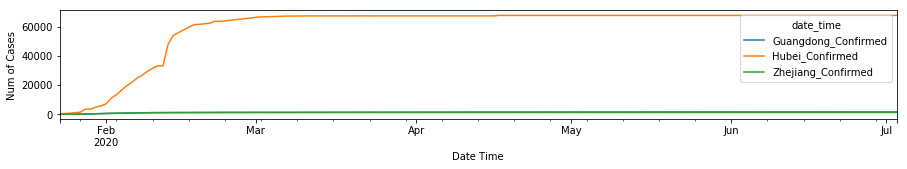

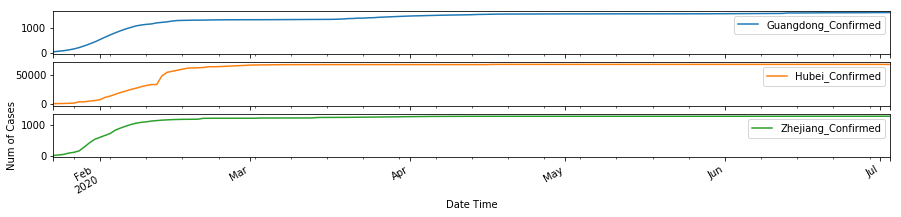

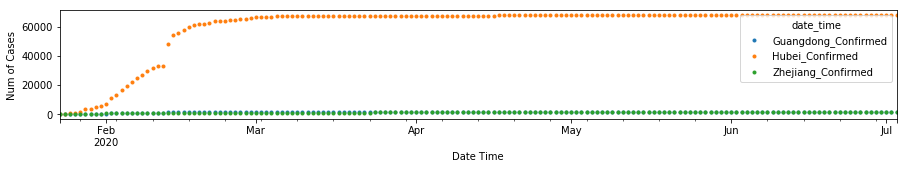

In [34]:
df1.plot(figsize=(15,2))
plt.axis(aspect='equal'); plt.xlabel('Date Time'); text=plt.ylabel('Num of Cases')
    
df1.plot(subplots=True, figsize=(15,3))
plt.axis(aspect='equal'); plt.xlabel('Date Time'); text=plt.ylabel('Num of Cases')

df1.plot(y=['Guangdong_Confirmed', 'Hubei_Confirmed', 'Zhejiang_Confirmed'], style='.', figsize=(15,2))
plt.axis(aspect='equal'); plt.xlabel('Date Time'); text=plt.ylabel('Num of Cases')

It is obvious that the curves of confirmed cases for Guangdong and Zhejiang provinces look quite similar, while that of Hubei province displays different pattern.

###  Identify periodicities & similarities

Next, let us explore how `compositing` can be done to identify the periodicities and similarities from the many observations along the time-series. This is especially useful when one is looking for responses to a specific time-series event that are combined with noise from a lot of other influences. Examples of compositing include the climatic response to a volcanic eruption, the global weather response to el Niño, calculating the mean diurnal cycle of surface temperature in Dallas at Texas, or finding if precipitation responds to the phase of the moon. The last two natural phenomena relate to sorting out the true amplitude of cyclic responses <a href="#References">[1]</a>.

Often compositing will reveal periodic phenomena with fixed phase that cannot be extracted from spectral analysis if the signal is small compared to the noise. Compositing makes no assumption of linearity, and it is good at separating small signals from noise, with sample large enough <a href="#References">[1]</a>.

What we need to do here, is to average the data in some clever way in relation to the event, the event signal will remain and all other influences will tend to average out. The overall workflow <a href="#References">[1]</a> includes:
  - Select the basis for compositing and define the categories;
  - Compute the means and statistics for each category;
  - Organize and display the results;
  - Validate the results.

Let's now split the time series up into its constituent cycles and stack them together via `pandas` and `matplotlib`. At this point we will also downsample to a 8-day rate, which makes the plot a bit clearer and quicker to generate.

In [91]:
minima = ["2020-01-23", "2020-01-31", 
          "2020-02-07", "2020-02-15", "2020-02-23", 
          "2020-03-03", "2020-03-11", "2020-03-19", 
          "2020-03-27", "2020-04-03", "2020-04-11",
          "2020-04-19", "2020-04-27", "2020-05-05", 
          "2020-05-13", "2020-05-21", 
          "2020-05-29", "2020-06-05", "2020-06-13",
          "2020-06-21", "2020-06-29", "2020-07-03"]

def split_into_cycles(province = 'Hubei', df2 = df_hubei):
    """Returns a list of dataframes, one for each cycle"""
    if df2 is None:
        key0 = province + '_Confirmed'
        key1 = province + '_Recovered'
        key2 = province + '_Death'
        df0.reset_index(drop= True)
        df_recovered_china.reset_index(drop= True)
        df_death_china.reset_index(drop= True)
        df2 = pd.concat([df0[key0],
                         df_recovered_china[key1],
                         df_death_china[key2]],
                        axis=1, ignore_index=True)
    else:
        print("Use existing DataFrame")
    df2.index = pd.to_datetime(df2.index, format='%m/%d/%Y %H:%M', exact = False)
    df_daily = df2.resample("8D").mean()
    
    cycles = []
    # Split by cycle
    for start, end in zip(minima[0:-1], minima[1:]):
        cycle = df2[start:end]
        # Convert from dates to days from minimum
        cycle.index = (cycle.index - cycle.index[0]).days
        # Extend so that each cycle lasts a full 100 days (filled with nan)
        cycle = cycle[~cycle.index.duplicated()]
        
        import numpy as np
        ix = pd.Int64Index(np.arange(0,100))
        cycle.reindex(ix)
        cycles.append(cycle)
    return cycles

cycles = split_into_cycles('Hubei', df_hubei)

Use existing DataFrame


By manually composing the list `minima`, we are expecting the output of `split_into_cycles` to be a list, `cycles` in this case, which contains 20 DataFrames, and each containing a different cycle. On each DataFrame, we have changed the index into the number of days from the minimum, and used `.reindex()` to fix them all to the same length so that we can perform arithmetic operations on them together. The following will create a plot of each parameter, with the cycles superposed over each other. 

In this example, we first create the figure and its axes using `matplotlib` directly (using `sharex=True` to link the x-axes on each plot), then direct the `pandas` plotting commands to point them to the axis we want each thing to plot onto using the ax kwarg. We also calculate the mean of the stacked time series.

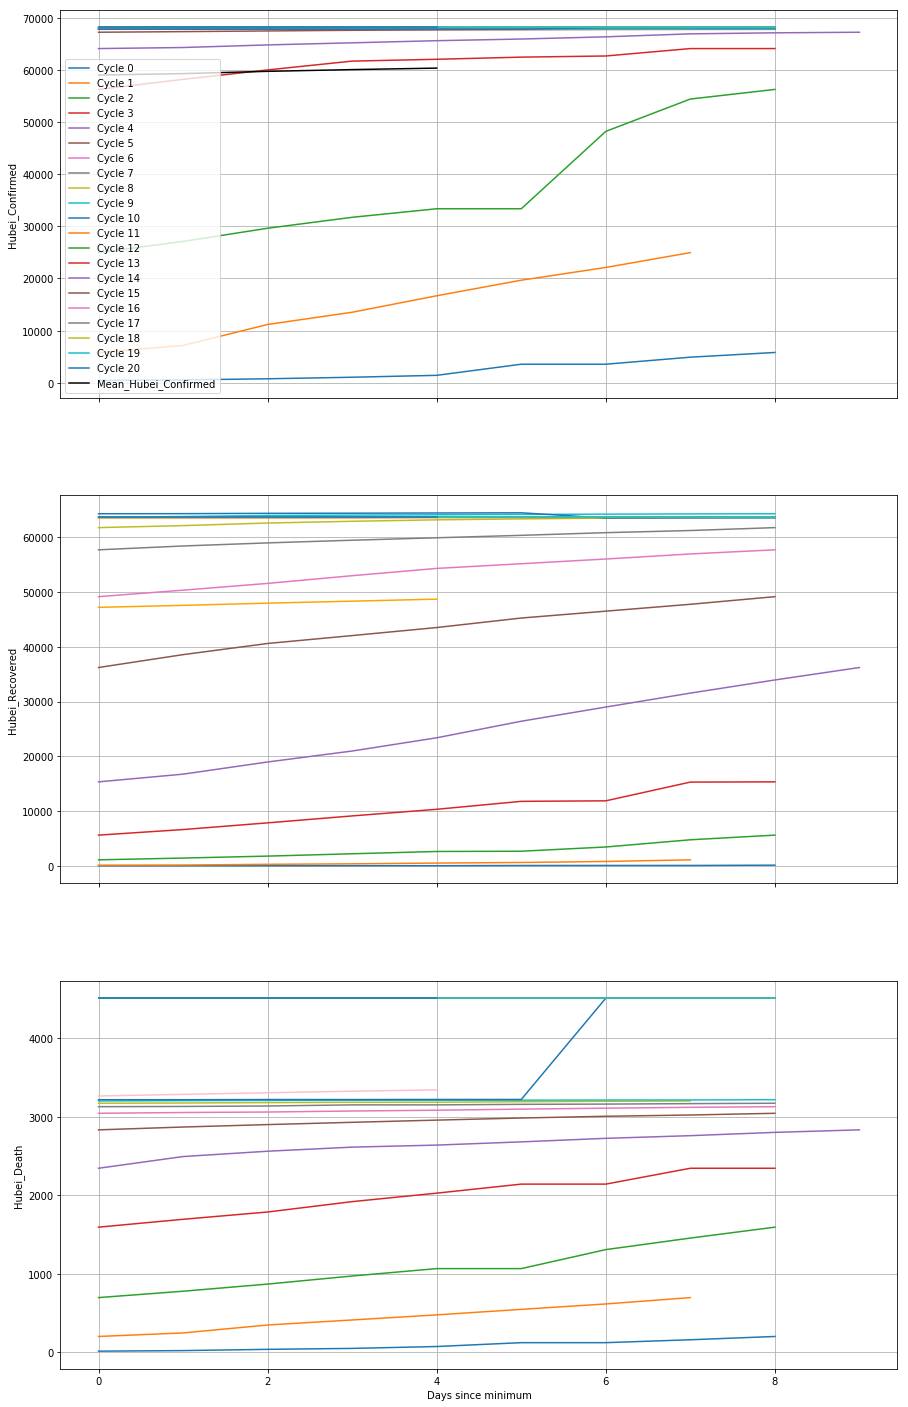

In [92]:
def plot_with_cycles(province = "Hubei"):
    fig, axes = plt.subplots(3, 1, figsize=(15,25), sharex=True)
    plt.subplots_adjust(wspace=0.25, 
                        hspace=0.25)
    key0 = province + '_Confirmed'
    key1 = province + '_Recovered'
    key2 = province + '_Death'
    for i, cycle in enumerate(cycles):
        cycle[key0].plot(ax=axes[0], label=f"Cycle {i}")
        cycle[key1].plot(ax=axes[1])
        cycle[key2].plot(ax=axes[2])
    N_cycles = len(cycles)
    (sum(cycles)[key0]/N_cycles).plot(ax=axes[0], color="black", label='Mean_'+key0)
    (sum(cycles)[key1]/N_cycles).plot(ax=axes[1], color="orange", label='Mean_'+key1)
    (sum(cycles)[key2]/N_cycles).plot(ax=axes[2], color="pink", label='Mean_'+key2)
    
    axes[0].set_ylabel(key0)
    axes[1].set_ylabel(key1)
    axes[2].set_ylabel(key2)
    axes[2].set_xlabel("Days since minimum")
    for ax in axes:
        ax.grid()
    axes[0].legend(loc="lower left")

plot_with_cycles()

This helps us to see how the cycles differ from each other. For example, the two most recent cycles (cycles 19 & 20 in this case) are consistently higher than the mean, both in the Recovered and Confirmed cases, while other cycles are always lower than the mean. Overall, there is no similar pattern between cycles detected via the plots.

By constructing the mean of the cycles, we are actually reinforcing the similar pattern over each cycle and reducing the effect of the random noise. This is the basis of a technique called <a href="https://www.sciencedirect.com/science/article/abs/pii/S1364682606000125?via%3Dihub">`superposed epoch analysis`</a>, which is useful for identifying periodicities and similarities between noisy time series.

## 3. Parse the time-series data (in the U. S., Australia & Canada)

Let's summarize the data we have seen so far:
  1. for countries/regions with significant numbers of confirmed/deaths/recovered cases (e.g. Mainland China), number of cases are reported per province/state; 
  2. for other regions/countries, number of cases are summarized per region/country (e.g. Australia, or Canada); 
  3. Also, the global DataFrame lists Cruise Ship since the Diamond Princess and several other cruise ships themselves contain a considerable amount of confirmed/deaths cases.

So far, we have covered the first case for Mainland China. Next, using the `plot_per_function` function defined previously, we can also look into the statistics for regions other than Mainland China that fall under case 1.

### Confirmed Cases in Australia & Canada

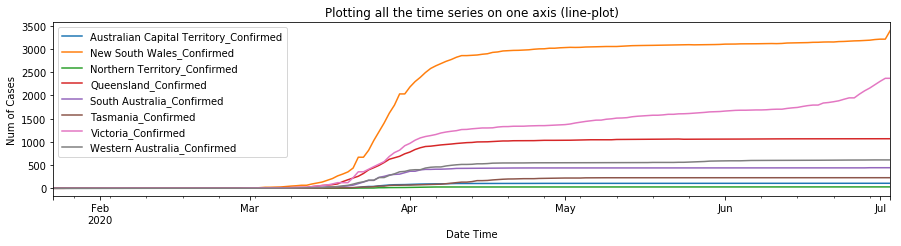

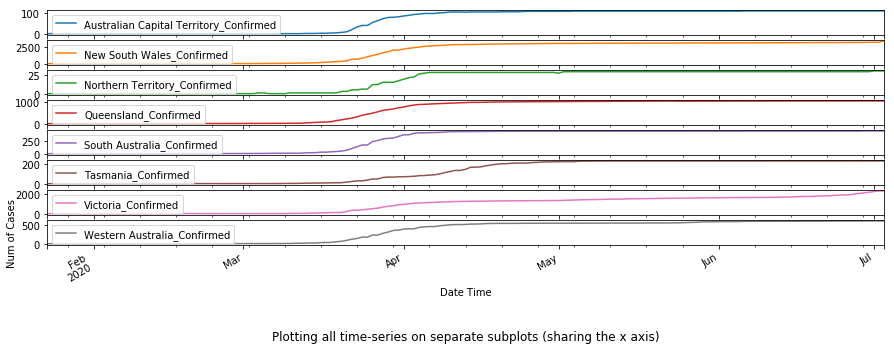

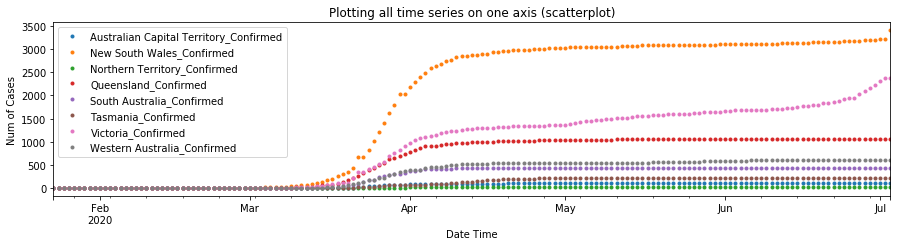

In [56]:
df_au_confirmed = plot_per_country(df_confirmed, "Australia")

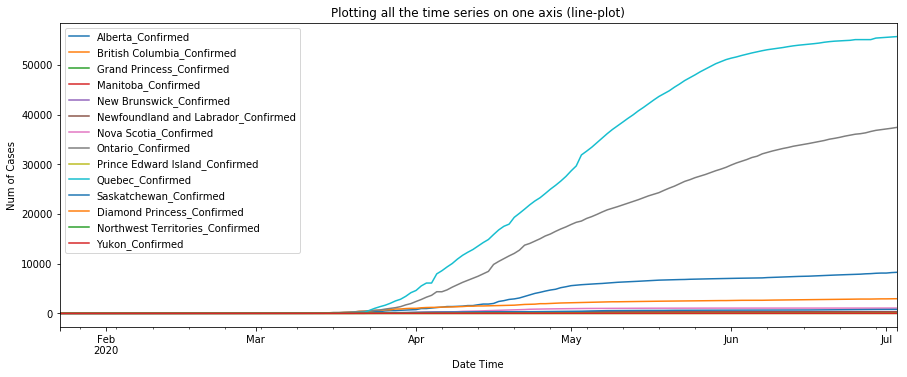

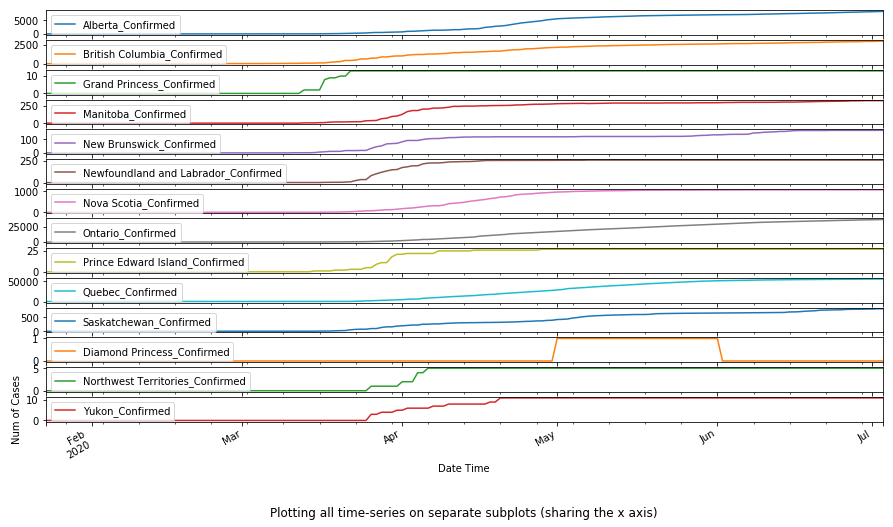

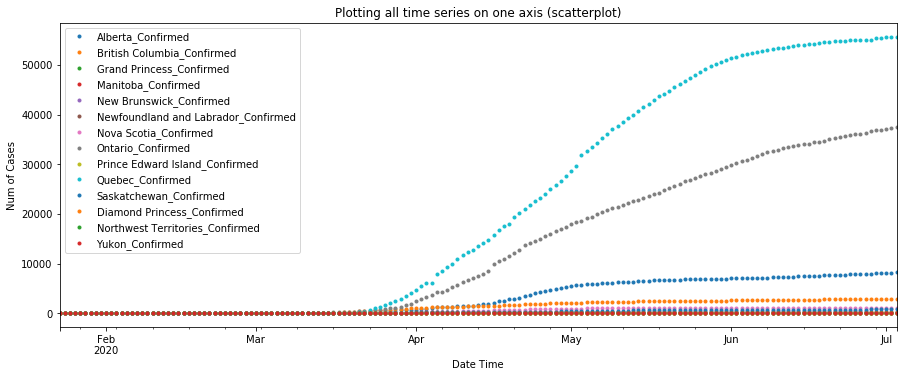

In [57]:
df_ca_confirmed = plot_per_country(df_confirmed, "Canada")

As shown in the plots above, New South Wales tops in Australia with 2500, and Quebec tops in Canada with 50,000 cases confirmed.

Next, we will look into the statistics collected for the United States.

### Confirmed Cases in the U.S.

Note here, the global DataFrame (a.k.a. `df_confirmed`) created previously only contains one row for the overall statistics of the entire United States, so we will instead use the other DataFrame object (i.e. `us_df_list[0]`) that was imported and parsed from the other GitHub link representing the per-state cases in the United States.

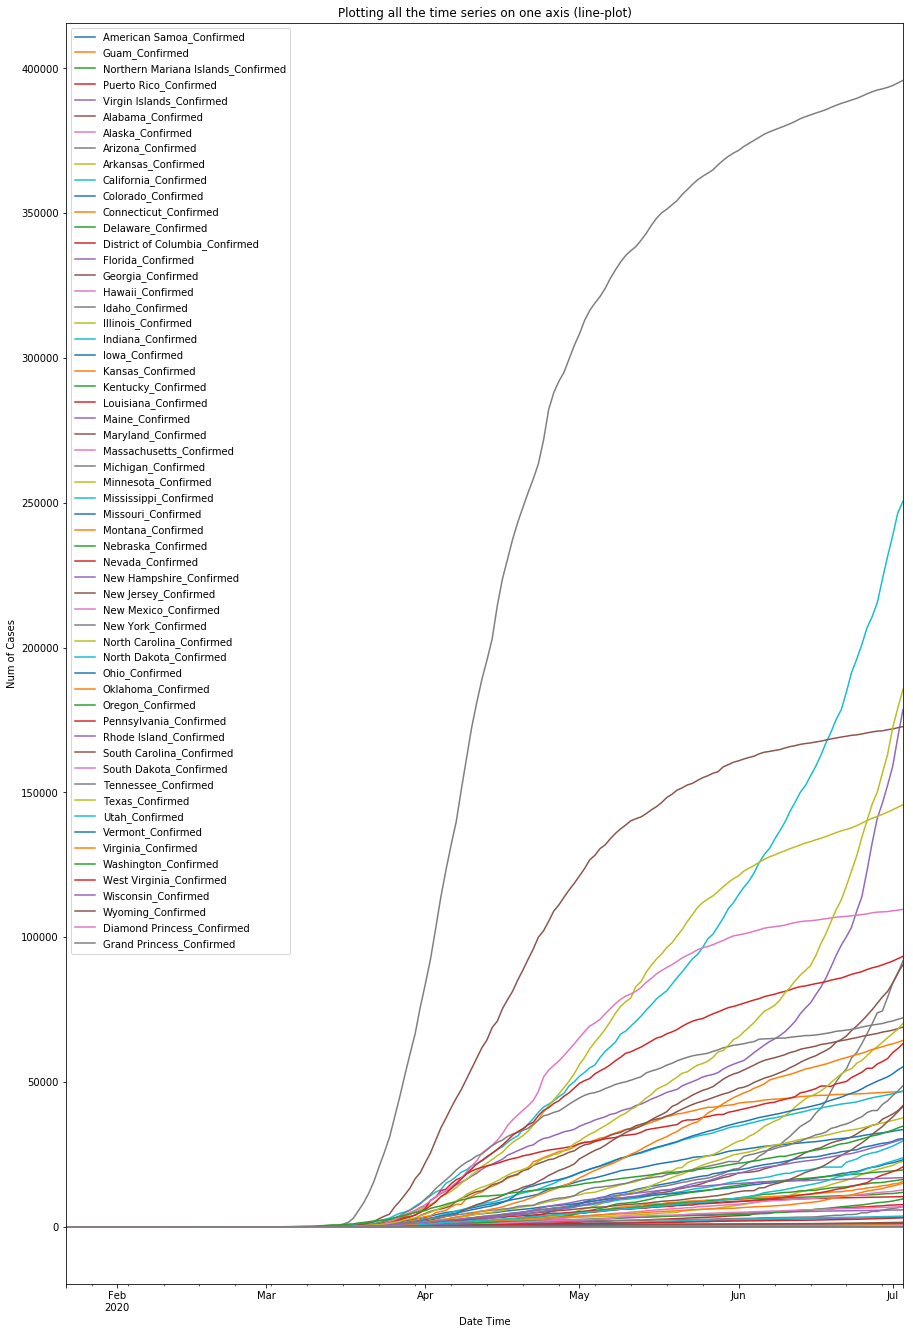

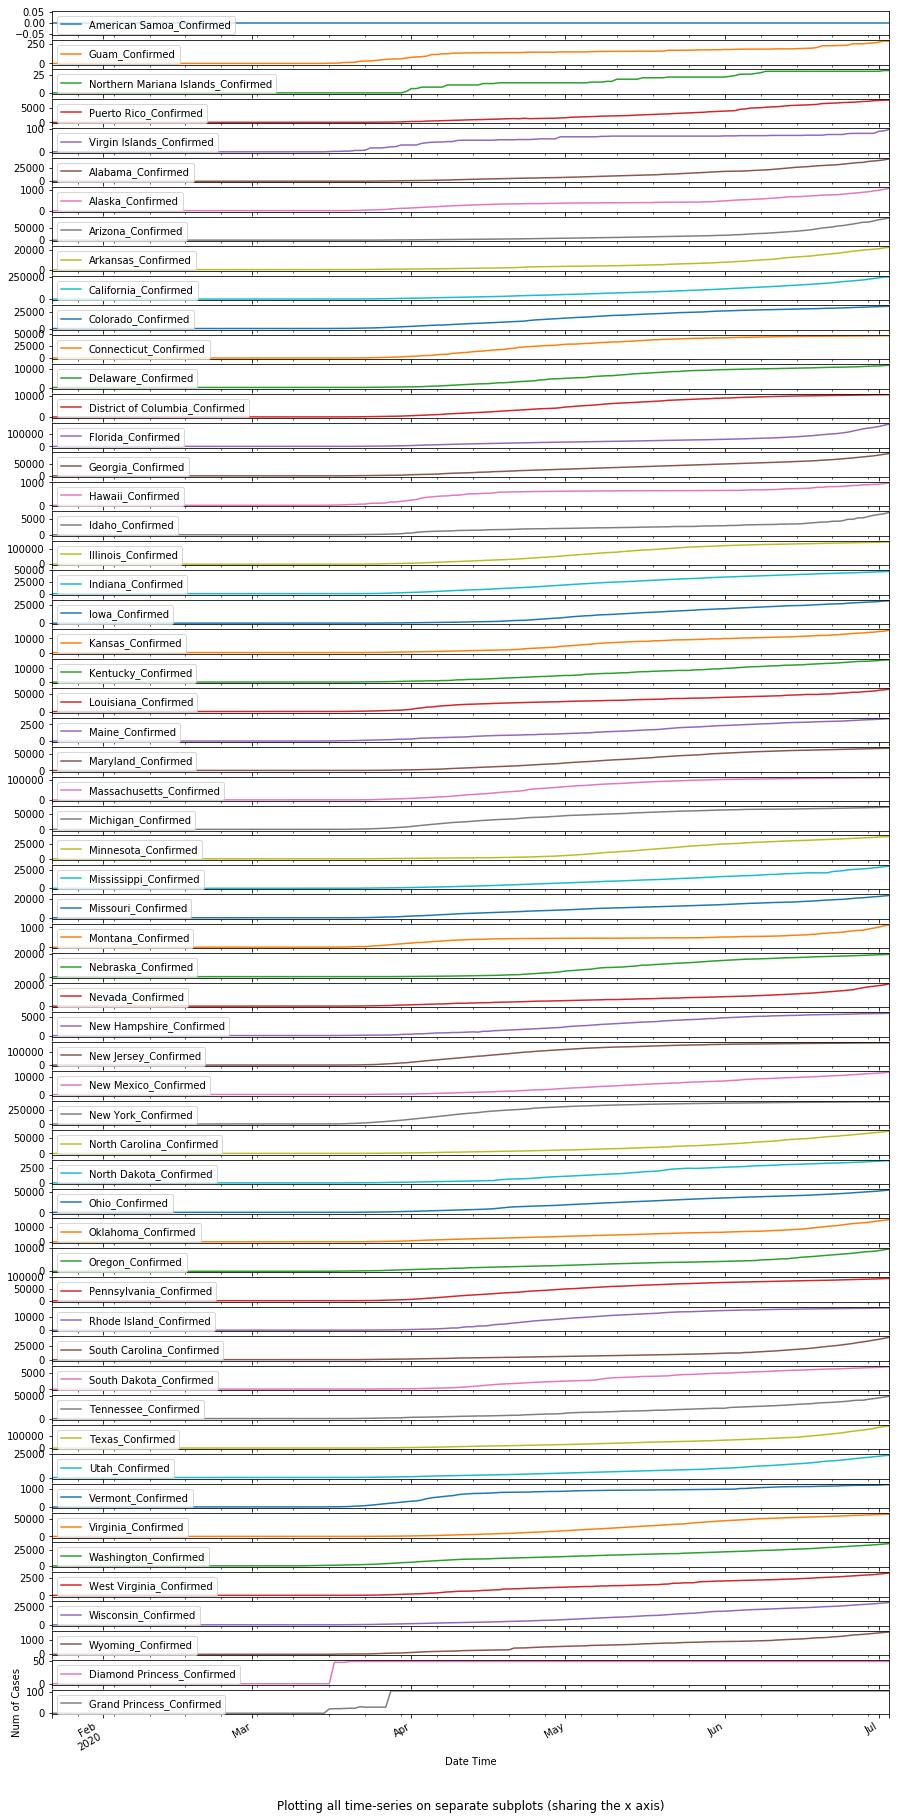

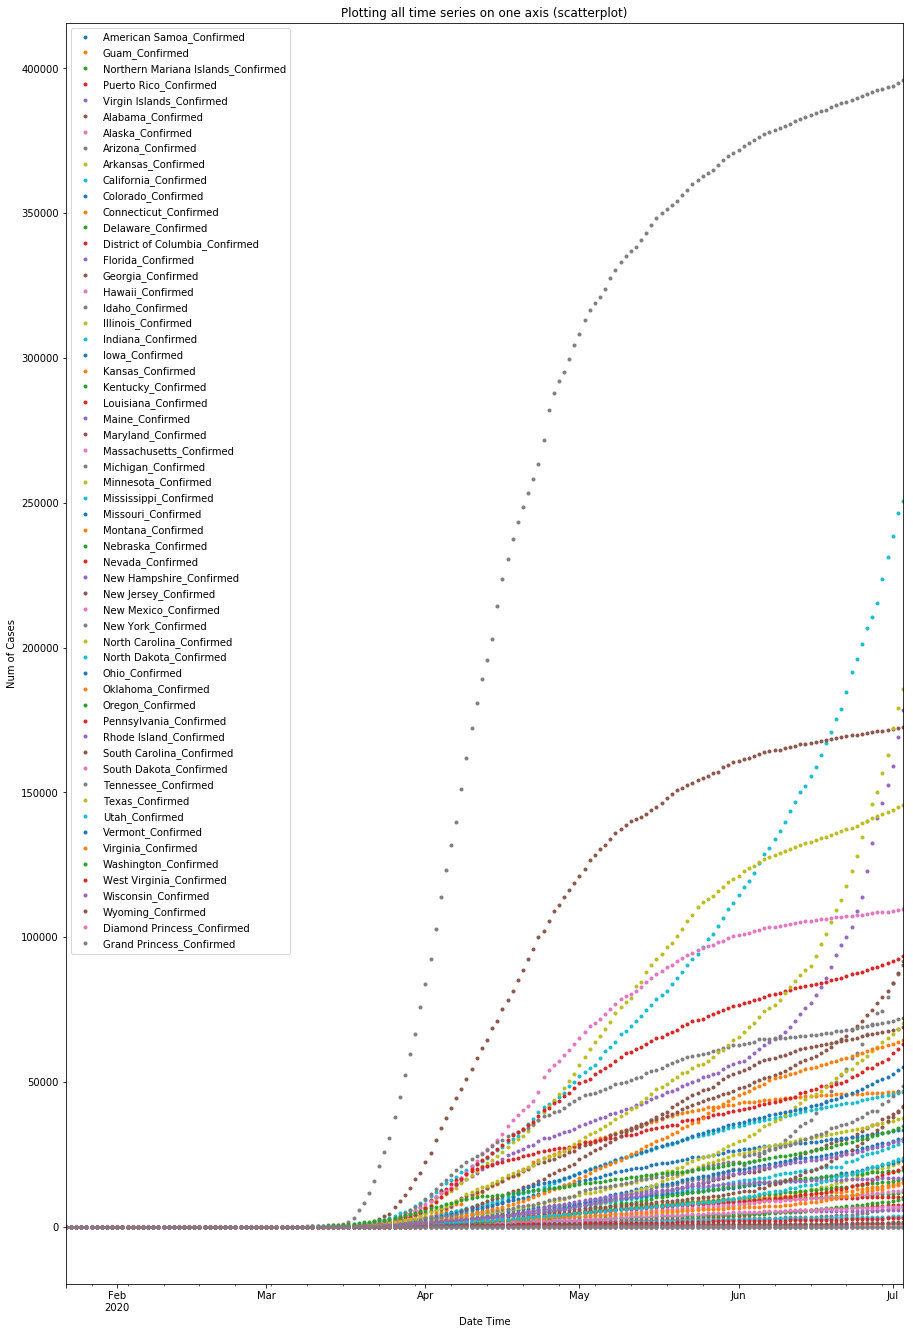

In [58]:
df_usa_confirmed = plot_per_country(us_df_list[0], "US")

The top 2 states with the highest numbers of confirmed cases in the U.S. so far are the States of New York and California.

### Confirmed Cases on Cruise Ships

In case 3 of this dataset, Cruise ships themselves are listed under the `Country\Region` column. We then plot the time-series of its data, appearing in two DataFrames - `df_confirmed` and `us_df_list[0]`, for cruise ships owned by other countries and the United States, respectively.

A customized function `time_series_per_location` is declared and used below to draw the time-series of confirmed cases reported on cruise ships.

In [85]:
def time_series_per_location(df=us_df_list[0], location="Diamond Princess", op=1):
    """ Used to plot the time-series of confirmed cases on cruise ships
    """
    if op==0:
        if 'Country/Region' in df.columns:
            df0 = df[df['Country/Region'] == location].iloc[:,5:].fillna(0)
        else:
            df0 = df[df['Country_Region'] == location].iloc[:,11:].fillna(0)
    elif op==1:
        if 'Province/State' in df.columns:
            df0 = df[df['Province/State'] == location].iloc[:,5:].fillna(0)
        else:
            df0 = df[df['Province_State'] == location].iloc[:,11:].fillna(0)
    
    df0 = df0.loc[:, ~df0.columns.str.contains('^Unnamed')]
    df0 = df0.T
    df0.index = df0.index.str.replace('/20', '/2020')
    df0.index = df0.index.str.replace('2020/2020', '20/2020')
    df0.index = pd.to_datetime(df0.index, format='%m/%d/%Y', exact = False)
    
    width_multiplier = df0.shape[1]/5

    df0.plot(figsize=(15,2*width_multiplier), 
             title='Plotting the time-series of confirmed cases (line-plot)').legend(loc='upper left')
    plt.axis(aspect='equal'); plt.xlabel('Date Time'); plt.ylabel('Num of Cases')

In [59]:
df_confirmed[df_confirmed['Country/Region'].str.contains('Princess')]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20
88,NaN,Diamond Princess,0.0,0.0,0,0,0,0,0,0,...,712,712,712,712,712,712,712,712,712,712


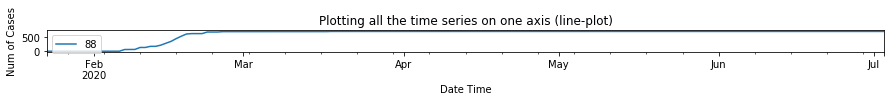

In [88]:
time_series_per_location(df=df_confirmed, location="Diamond Princess", op=0)

In [85]:
us_df_list[0][us_df_list[0]['Province_State']=='Diamond Princess']

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20
57,NaN,US,USA,840,NaN,NaN,Diamond Princess,US,0,0,...,49,49,49,49,49,49,49,49,49,49


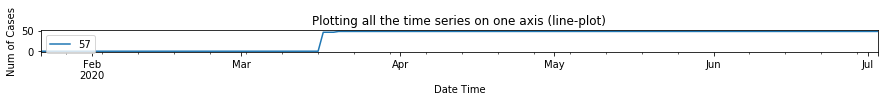

In [86]:
time_series_per_location()

In [86]:
us_df_list[0][us_df_list[0]['Province_State']=='Grand Princess']

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20
58,NaN,US,USA,840,NaN,NaN,Grand Princess,US,0,0,...,103,103,103,103,103,103,103,103,103,103


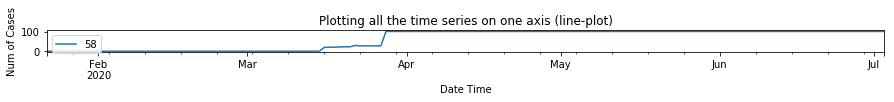

In [87]:
time_series_per_location(location="Grand Princess")

Comparing these three time-series plots, we can see that for the cruise ship #1, the number of cases experienced a rapid rise in mid-Feb, while for #2 and #3, the rapid climb of confirmed cases happened in mid-March and end of March, respectively.

## 4. Time Series Lag Scatter Plots

Time series modeling assumes a relationship between an observation and the previous observation. Previous observations in a time series are called `lags`, with the observation at the previous time step called `lag1`, the observation at two time steps ago `lag2`, and so on.

A useful type of plot to explore the relationship between each observation and a lag of that observation is the <a href="https://machinelearningmastery.com/time-series-data-visualization-with-python/">scatter plot</a>. `Pandas` has a built-in function for exactly this called `the lag plot`. It plots the observation at time `t` on the x-axis and the lag1 observation `(t-1)` on the y-axis.
  - If the points cluster along a diagonal line from the bottom-left to the top-right of the plot, it suggests a positive correlation relationship.
  - If the points cluster along a diagonal line from the top-left to the bottom-right, it suggests a negative correlation relationship.
  - Either relationship is good as they can be modeled.

More points tighter in to the diagonal line suggests a stronger relationship and more spread from the line suggests a weaker relationship. A ball in the middle or a spread across the plot suggests a weak or no relationship.

Below is an example of a lag plot for the `Hubei_Confirmed` Series.

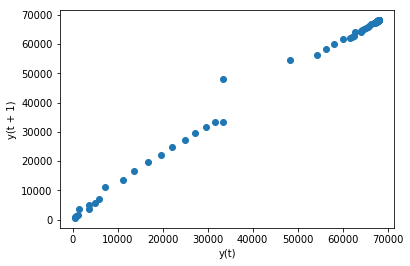

In [89]:
from matplotlib import pyplot
from pandas.plotting import lag_plot
lag_plot(df1['Hubei_Confirmed'])
pyplot.show()

Because the points cluster along the diagonal line from bottom-left to the top-right, and more points are tighter to the diagonal line compared to points loosely spread from the line, so we can say the plot suggests a strong positive correlation relationship between the observation and its lag1.

We can repeat this process for an observation and any lag values. Perhaps with the observation at the same time last week, last month, or last year, or any other domain-specific knowledge we may wish to explore. For example, we can create a scatter plot for the observation with each value in the previous seven days. Below is an example of this for the `Hubei_Confirmed` Series.

In the cell below, first, a new DataFrame is created with the lag values as new columns. The columns are named appropriately. Then a new subplot is created that plots each observation with a different lag value.

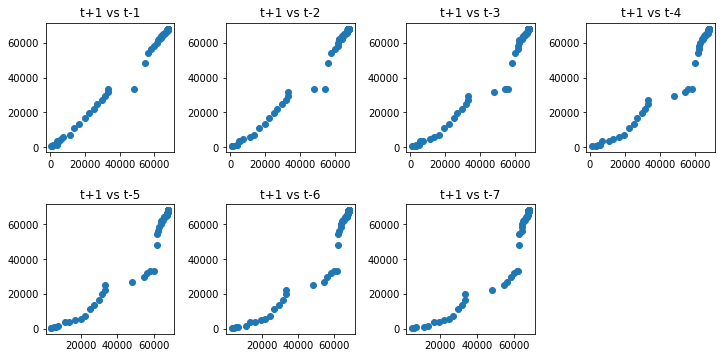

In [90]:
values = df1['Hubei_Confirmed']
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
dataframe.columns = columns
pyplot.figure(1, figsize=(12,9))
for i in range(1,(lags + 1)):
    ax = pyplot.subplot(240 + i)
    pyplot.subplots_adjust(bottom=0.4, wspace = 0.4, hspace = 0.4)
    ax.set_title('t+1 vs t-' + str(i))
    pyplot.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
pyplot.show()

Running the code block above suggests the strongest relationship between an observation with its lag1 value, but generally a good positive correlation with each value in the last week.

## 5. Time Series Autocorrelation Plots

We can quantify the strength and type of relationship between observations and their lags. In statistics, this is called correlation, and when calculated against lag values in time series, it is called `autocorrelation` (self-correlation).

A correlation value calculated between two groups of numbers, such as observations and their lag1 values, results in a number between -1 and 1. The sign of this number indicates a negative or positive correlation respectively. A value close to zero suggests a weak correlation, whereas a value closer to -1 or 1 indicates a strong correlation.

Correlation values, called `correlation coefficients`, can be calculated for each observation and different lag values. Once calculated, a plot can be created to help better understand how this relationship changes over the lag. This type of plot is called `an autocorrelation plot` and `Pandas` provides this capability built in, called the `autocorrelation_plot()` function.

The cell below creates an <a href="https://machinelearningmastery.com/time-series-data-visualization-with-python/">autocorrelation plot</a> for the `Hubei_Confirmed` Series:

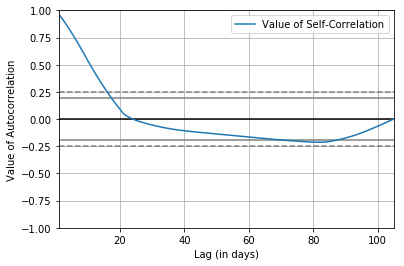

In [65]:
from pandas.plotting import autocorrelation_plot
ax = autocorrelation_plot(df1['Hubei_Confirmed'], label="Value of Self-Correlation")
ax.set_xlabel("Lag (in days)")
ax.set_ylabel("Value of Autocorrelation")
pyplot.show()

The resulting plot shows lag (in days) along the x-axis and the value of correlation on the y-axis. Dotted lines are provided that indicate any correlation values beyond those lines are `statistically significant`. We can see that for the `Hubei_Confirmed` Series, cycles of strong positive correlation before day 6. This captures the relationship of an observation with past observations, and there is no seasonal or recurrent trends.

## Conclusions

While many countries or regions have struggled to cope with the rapid spread of the virus, it is important for everyone to closely monitor the situations and take precautionary measures. Serving to the purpose, this notebook has discussed how to perform data analysis and time series charting of COVID-19 cases across the globe at various levels, which includes all provinces in Mainland China, the United States, Australia, and Canada, and Cruise Ships with reported cases. Also, approaches to perform cross-comparisons within different categories, or provinces/states, are demonstrated here, to help figure out which provinces/states in the selected countries are impacted the most, or at critical phases of virus development. Then, Time-Series Lag Scatter plots and Autocorrelation Plots are drawn in the process of studying the time-lag-correlation, and the autocorrelation of the COVID-19 time-series. 

More info can be found at <a href="https://storymaps.arcgis.com/stories/4fdc0d03d3a34aa485de1fb0d2650ee0">storymaps</a>. You can also check out <a href="./covid19_part3_predictive_analysis.ipynb">this notebook</a> for predictive analysis of COVID-19 trends.

## References

[1] "Compositing or Superposed Epoch Analysis", https://atmos.washington.edu/~dennis/552_Notes_2.pdf, accessed on 07/04/2020